# Analyse einer Twitter-Abfrage zun Wort vegan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Achtung: Nehmt eure eigenen Pfade mit meinen wirds nicht funktionieren!**

In [2]:
# Laden der Dataframes 
## TW ....csv sind Tweets
## RT ...csv sind Retweets
tweets_df = pd.read_csv('TW_vegan_2021-03-17')
retweets_df = pd.read_csv('RT_vegan_2021-03-17')

### Zahl der twetter und ihrer tweets
Wieviele tweeter und retweeter sind in der Abfrage?

In [3]:
tweeter = tweets_df["user_name"].unique()
tweets = tweets_df["tweet_id"].unique()
tweet_fol_max = tweets_df["followers_count"].max()
tweet_fol_avg = tweets_df["followers_count"].mean()
tweet_fol_median = tweets_df["followers_count"].median()
tweet_friends_max = tweets_df["friends_count"].max()
tweet_favourite_median = tweets_df["favourite_count"].median()
tweet_favourite_max = tweets_df["favourite_count"].max()

print("tweeter" ,len(tweeter), "\n-> ihre tweets",len(tweets), "\n-> followers max", tweet_fol_max, "avg", tweet_fol_avg, 
      "median", tweet_fol_median,"\n-> friends max", tweet_friends_max, "\n-> gefällt mir max" ,tweet_favourite_max, "median", tweet_favourite_median)

tweeter 21 
-> ihre tweets 32 
-> followers max 12578839 avg 1322906.8125 median 222374.0 
-> friends max 89050 
-> gefällt mir max 5646 median 137.5


In [4]:
retweeter = retweets_df["user_name"].unique()
retweets = retweets_df["tweet_id"].unique()
retweets_median = retweets_df["retweet_count"].median()
retweets_quant_09 = retweets_df["retweet_count"].quantile(0.9)
retweets_max = retweets_df["retweet_count"].max()
retweet_fol_max = retweets_df["followers_count"].max()
retweets_fol_quant_09 = retweets_df["followers_count"].quantile(0.9)
retweet_friends_max = retweets_df["friends_count"].max()


print("retweeter" ,len(retweeter), "\n-> ihre retweets",len(retweets),
      "\n-> retweets Median",retweets_median," nur 10% haben mehr als" ,retweets_quant_09," retweets  - max", retweets_max,
      "\n-> followers max", retweet_fol_max," nur 10% haben mehr als ",retweets_fol_quant_09,"followers",
      "\n-> friends max", retweet_friends_max)

retweeter 321 
-> ihre retweets 347 
-> retweets Median 27.0  nur 10% haben mehr als 82.0  retweets  - max 95 
-> followers max 112326  nur 10% haben mehr als  2954.2000000000035 followers 
-> friends max 16347


In [5]:
# 1000 Gesammelte Tweets
## Primärschlüssel tweet_id
print(tweets_df.shape)
tweets_df.head(3)

(32, 17)


,Unnamed: 0,tweet_id,creation_date,full_text,mentions,entities_hashtags,user_name,user_screen_name,user_id,location,description,protected,followers_count,friends_count,profile_created_at,retweet_count,favourite_count
0,0,1371572442477563912,Mon Mar 15 21:22:07 +0000 2021,Those vegan tacos...they guac my world. https:...,[],[],Cory Booker,CoryBooker,15808765,"Newark, NJ",U.S. Senator from New Jersey. Most tweets (and...,False,4962385,89050,Mon Aug 11 14:41:16 +0000 2008,306,5646
1,1,1371643167922139139,Tue Mar 16 02:03:09 +0000 2021,Did you know with just a few household ingredi...,['futurelettuce'],[],Tasty,tasty,4020532937,NaN,Cookie mix like you’ve never seen before! 🍪 No...,False,1431060,163,Fri Oct 23 00:29:41 +0000 2015,95,340
2,2,1371742083011186690,Tue Mar 16 08:36:12 +0000 2021,#Competition to #WIN @StDalfourUK prize bundle...,"['StDalfourUK', 'StDalfourUK', 'SuzyPelta', 'S...","[{'text': 'Competition', 'indices': [0, 12]}, ...",Suzy Pelta 👩🏽‍🍳,SuzyPelta,19257934,London,🍰@Lorraine Cake Club Winner| 😍Ambassador for @...,False,23183,1363,Tue Jan 20 21:16:52 +0000 2009,122,73


In [6]:
# Gesammelte Retweets auf obige Tweets
## Primärschlüssel tweet_id, Fremdschlüssel auf Tabelle TW..csv ist "RT_of_ID"
print(retweets_df.shape)
retweets_df.head(3)

(347, 18)


,Unnamed: 0,tweet_id,creation_date,full_text,mentions,entities_hashtags,user_name,user_screen_name,user_id,location,description,protected,followers_count,friends_count,profile_created_at,retweet_count,favourite_count,RT_of_ID
0,0,1372002197311918082,Wed Mar 17 01:49:49 +0000 2021,RT @tasty: Did you know with just a few househ...,['tasty'],[],🥚𝒜𝓊𝓇❀𝓇𝒶🥚,slsabilaurora,870745146517667840,"Kalimantan Selatan, Indonesia",🌱,False,411,4975,Fri Jun 02 20:53:15 +0000 2017,95,0,1371643167922139139
1,1,1371990567412989955,Wed Mar 17 01:03:36 +0000 2021,RT @tasty: Did you know with just a few househ...,['tasty'],[],Samson Williams,Plainsmaster,299087579,earth,I Found Jesus!!!!! He was selling oranges on t...,False,22,536,Sun May 15 13:51:23 +0000 2011,95,0,1371643167922139139
2,2,1371986163913883658,Wed Mar 17 00:46:06 +0000 2021,RT @tasty: Did you know with just a few househ...,['tasty'],[],Ashlyn Faye Everett,acheetah42496,391193471,"Birmingham, AL",I'm 24 and I am a really nice person and I lik...,False,756,4961,Sat Oct 15 05:59:32 +0000 2011,95,0,1371643167922139139


In [7]:
# Joinen der beiden DF mit Left-Join 
df = pd.merge(left=tweets_df, right=retweets_df, how='left', left_on='tweet_id', right_on='RT_of_ID')
df.head(2)

,Unnamed: 0_x,tweet_id_x,creation_date_x,full_text_x,mentions_x,entities_hashtags_x,user_name_x,user_screen_name_x,user_id_x,location_x,...,user_id_y,location_y,description_y,protected_y,followers_count_y,friends_count_y,profile_created_at_y,retweet_count_y,favourite_count_y,RT_of_ID
0,0,1371572442477563912,Mon Mar 15 21:22:07 +0000 2021,Those vegan tacos...they guac my world. https:...,[],[],Cory Booker,CoryBooker,15808765,"Newark, NJ",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1371643167922139139,Tue Mar 16 02:03:09 +0000 2021,Did you know with just a few household ingredi...,['futurelettuce'],[],Tasty,tasty,4020532937,NaN,...,8.707451e+17,"Kalimantan Selatan, Indonesia",🌱,False,411.0,4975.0,Fri Jun 02 20:53:15 +0000 2017,95.0,0.0,1.371643e+18


In [8]:
# Welche columns kann ich auswerten?
df.columns

Index(['Unnamed: 0_x', 'tweet_id_x', 'creation_date_x', 'full_text_x',
       'mentions_x', 'entities_hashtags_x', 'user_name_x',
       'user_screen_name_x', 'user_id_x', 'location_x', 'description_x',
       'protected_x', 'followers_count_x', 'friends_count_x',
       'profile_created_at_x', 'retweet_count_x', 'favourite_count_x',
       'Unnamed: 0_y', 'tweet_id_y', 'creation_date_y', 'full_text_y',
       'mentions_y', 'entities_hashtags_y', 'user_name_y',
       'user_screen_name_y', 'user_id_y', 'location_y', 'description_y',
       'protected_y', 'followers_count_y', 'friends_count_y',
       'profile_created_at_y', 'retweet_count_y', 'favourite_count_y',
       'RT_of_ID'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0_x,tweet_id_x,user_id_x,followers_count_x,friends_count_x,retweet_count_x,favourite_count_x,Unnamed: 0_y,tweet_id_y,user_id_y,followers_count_y,friends_count_y,retweet_count_y,favourite_count_y,RT_of_ID
count,358.000000,3.580000e+02,3.580000e+02,3.580000e+02,358.000000,358.000000,358.000000,347.000000,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.0,3.470000e+02
mean,15.282123,1.371228e+18,1.190395e+09,9.373837e+05,6155.215084,45.729050,253.134078,173.000000,1.371392e+18,4.954560e+17,1578.841499,1508.317003,39.400576,0.0,1.371251e+18
std,10.048692,9.632823e+14,1.732093e+09,2.230118e+06,9593.758190,48.194306,503.409183,100.314505,9.068492e+14,5.652605e+17,6990.496531,2074.430161,26.453106,0.0,9.592378e+14
min,0.000000,1.369308e+18,9.890492e+06,1.441600e+04,26.000000,9.000000,18.000000,0.000000,1.369318e+18,6.266142e+06,0.000000,0.000000,9.000000,0.0,1.369308e+18
25%,7.000000,1.371300e+18,2.175440e+07,6.225700e+04,1071.000000,19.000000,40.000000,86.500000,1.371447e+18,4.391779e+08,90.000000,229.000000,19.000000,0.0,1.371383e+18
50%,13.000000,1.371499e+18,1.005519e+08,1.959700e+05,4067.000000,27.000000,67.000000,173.000000,1.371745e+18,2.942478e+09,318.000000,554.000000,27.000000,0.0,1.371499e+18
75%,26.000000,1.371921e+18,3.235113e+09,1.081514e+06,6105.000000,71.000000,297.000000,259.500000,1.371993e+18,1.081454e+18,937.000000,2134.000000,58.000000,0.0,1.371921e+18
max,31.000000,1.372138e+18,4.805771e+09,1.257884e+07,89050.000000,474.000000,5646.000000,346.000000,1.372192e+18,1.371953e+18,112326.000000,16347.000000,95.000000,0.0,1.372138e+18


In [10]:
# Eine beliebige Tweet ID samplen aus dem Retweet Dataframe
test_id = retweets_df.loc[0, 'RT_of_ID']

In [11]:
# Suchen der Tweet_ID im neuen DF müssten gleich viele SPalten sein wie im Retweets Dataframe, wenn nach gleicher ID gesucht wird
df[df['tweet_id_x'] == test_id].shape
df[df['tweet_id_x'] == test_id].head(2)

,Unnamed: 0_x,tweet_id_x,creation_date_x,full_text_x,mentions_x,entities_hashtags_x,user_name_x,user_screen_name_x,user_id_x,location_x,...,user_id_y,location_y,description_y,protected_y,followers_count_y,friends_count_y,profile_created_at_y,retweet_count_y,favourite_count_y,RT_of_ID
1,1,1371643167922139139,Tue Mar 16 02:03:09 +0000 2021,Did you know with just a few household ingredi...,['futurelettuce'],[],Tasty,tasty,4020532937,NaN,...,8.707451e+17,"Kalimantan Selatan, Indonesia",🌱,False,411.0,4975.0,Fri Jun 02 20:53:15 +0000 2017,95.0,0.0,1.371643e+18
2,1,1371643167922139139,Tue Mar 16 02:03:09 +0000 2021,Did you know with just a few household ingredi...,['futurelettuce'],[],Tasty,tasty,4020532937,NaN,...,2.990876e+08,earth,I Found Jesus!!!!! He was selling oranges on t...,False,22.0,536.0,Sun May 15 13:51:23 +0000 2011,95.0,0.0,1.371643e+18


In [12]:
retweets_df[retweets_df['RT_of_ID'] == test_id].shape
retweets_df[retweets_df['RT_of_ID'] == test_id].head(2)

,Unnamed: 0,tweet_id,creation_date,full_text,mentions,entities_hashtags,user_name,user_screen_name,user_id,location,description,protected,followers_count,friends_count,profile_created_at,retweet_count,favourite_count,RT_of_ID
0,0,1372002197311918082,Wed Mar 17 01:49:49 +0000 2021,RT @tasty: Did you know with just a few househ...,['tasty'],[],🥚𝒜𝓊𝓇❀𝓇𝒶🥚,slsabilaurora,870745146517667840,"Kalimantan Selatan, Indonesia",🌱,False,411,4975,Fri Jun 02 20:53:15 +0000 2017,95,0,1371643167922139139
1,1,1371990567412989955,Wed Mar 17 01:03:36 +0000 2021,RT @tasty: Did you know with just a few househ...,['tasty'],[],Samson Williams,Plainsmaster,299087579,earth,I Found Jesus!!!!! He was selling oranges on t...,False,22,536,Sun May 15 13:51:23 +0000 2011,95,0,1371643167922139139


## Auswertung TW

In [13]:
# Defintion des Anteils
viele = 0.8


# Auwahl des Anteils
t_fol_viele = tweets_df['followers_count'].quantile(viele)
df_fol = tweets_df.loc[(tweets_df['followers_count'] >= t_fol_viele)].drop_duplicates("user_name").sort_values(by=['followers_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_fol


,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
20,1244602586,الوليد بن طلال,12578839,216,1141,37
29,87818409,The Guardian,9610752,72,297,1071
21,40981798,hayley from Paramore 🥀,5092126,229,3798,26
0,15808765,Cory Booker,4962385,306,5646,89050
1,4020532937,Tasty,1431060,95,340,163
10,9890492,PETA,1081514,22,66,5030


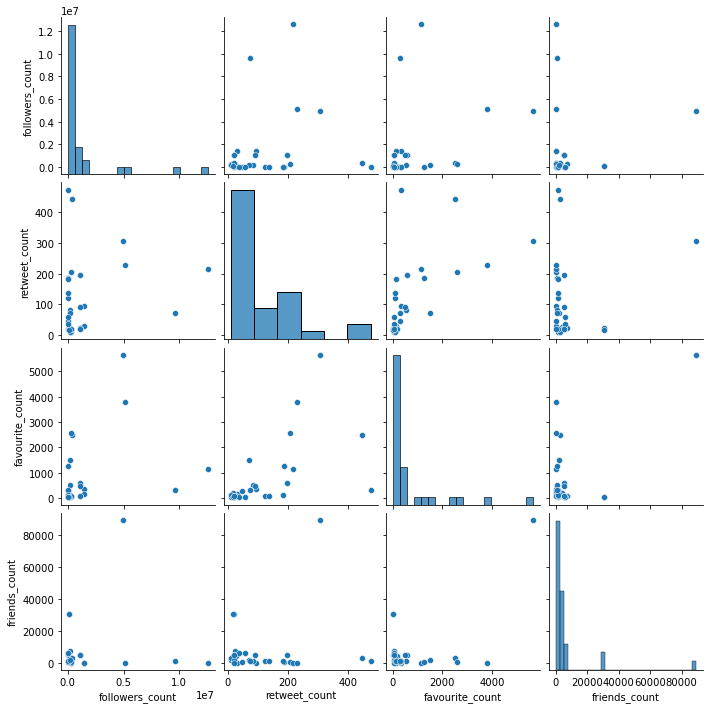

In [14]:
tweet_val = tweets_df[['followers_count','retweet_count','favourite_count','friends_count']]
ax = sns.pairplot(tweet_val)

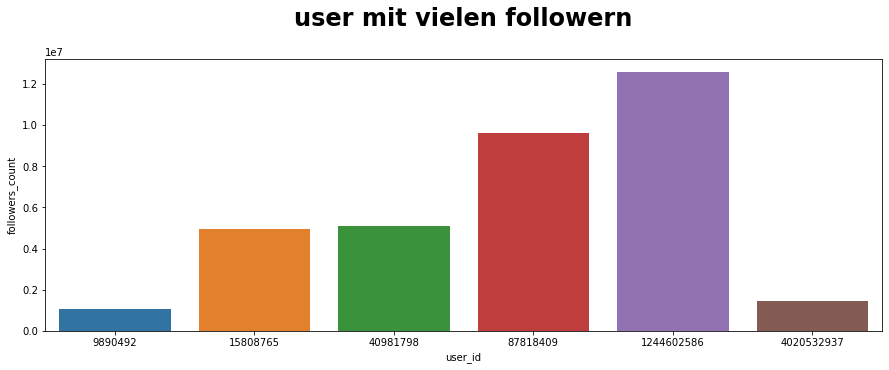

In [15]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen followern", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="followers_count", data=df_fol)

### Wer hat am meisten favourits?

In [16]:
favour_viele = tweets_df['favourite_count'].quantile(viele)
df_favour = tweets_df.loc[(tweets_df['favourite_count'] >= favour_viele)].drop_duplicates("user_name").sort_values(by=['favourite_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_favour

,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
0,15808765,Cory Booker,4962385,306,5646,89050
21,40981798,hayley from Paramore 🥀,5092126,229,3798,26
17,35551733,Elvira,269932,205,2579,509
16,57441414,ZUBY:,353409,444,2493,2745
25,74087670,JP,161053,71,1503,1969
22,92539495,Big Zuu,46711,186,1247,565
20,1244602586,الوليد بن طلال,12578839,216,1141,37


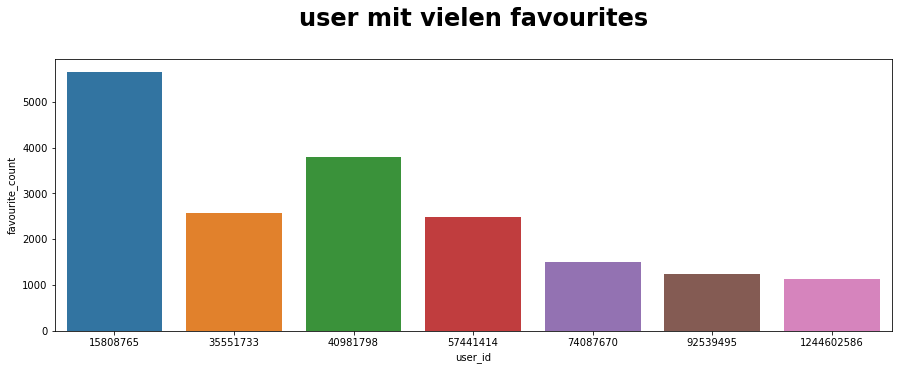

In [17]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen favourites", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="favourite_count", data=df_favour)

In [18]:
t_ret_viele = tweets_df['retweet_count'].quantile(viele)
df_ret = tweets_df.loc[(tweets_df['retweet_count'] >= t_ret_viele)].drop_duplicates("user_name").sort_values(by=['retweet_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_ret

,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
18,19257934,Suzy Pelta 👩🏽‍🍳,23183,474,326,1363
16,57441414,ZUBY:,353409,444,2493,2745
0,15808765,Cory Booker,4962385,306,5646,89050
21,40981798,hayley from Paramore 🥀,5092126,229,3798,26
20,1244602586,الوليد بن طلال,12578839,216,1141,37
17,35551733,Elvira,269932,205,2579,509
23,9890492,PETA,1081514,197,575,5030


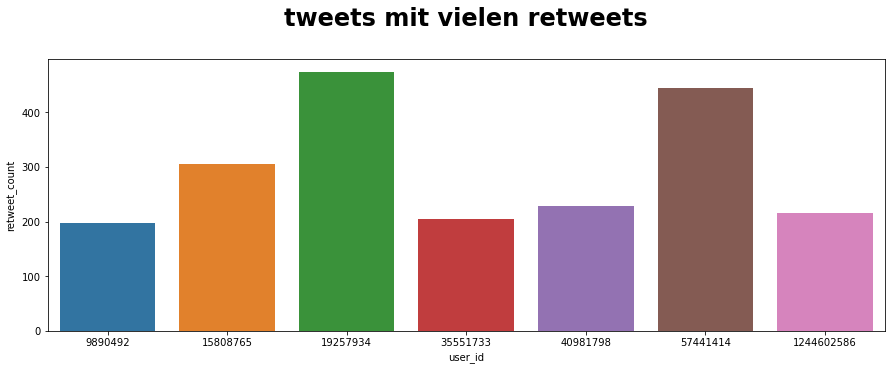

In [19]:
plt.figure(figsize=(15,5))
plt.title("tweets mit vielen retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="retweet_count", data=df_ret)

### Wer hat am meisten friends?¶

In [20]:
friends_viele = tweets_df['friends_count'].quantile(viele)
df_friends = tweets_df.loc[(tweets_df['friends_count'] >= friends_viele)].drop_duplicates("user_name").sort_values(by=['friends_count'], ascending=False)[['user_id','user_name','followers_count','retweet_count','favourite_count','friends_count']]
df_friends

,user_id,user_name,followers_count,retweet_count,favourite_count,friends_count
0,15808765,Cory Booker,4962385,306,5646,89050
5,357584312,PETA UK,100746,21,27,30490
4,21754399,The Vegan Society,237622,24,67,7299
26,100551915,Deborah Mitchell,27826,37,34,6105
10,9890492,PETA,1081514,22,66,5030


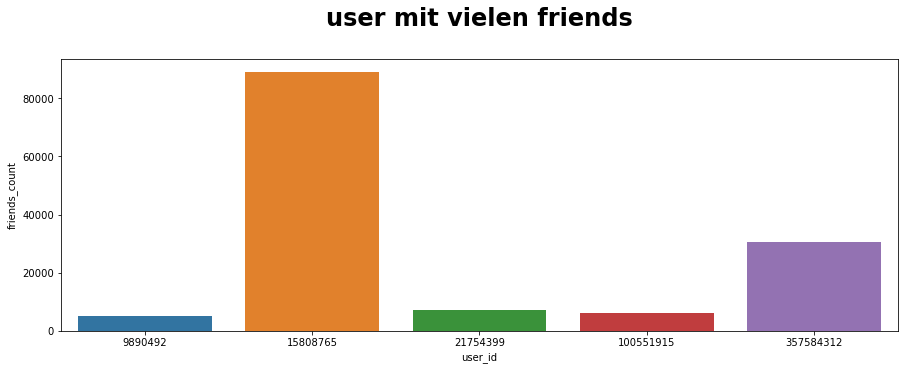

In [21]:
plt.figure(figsize=(15,5))
plt.title("user mit vielen friends", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
ax = sns.barplot(x="user_id", y="friends_count", data=df_friends)

## Auswertung RT

In [22]:
retweets_val = retweets_df[['followers_count','retweet_count','friends_count']]

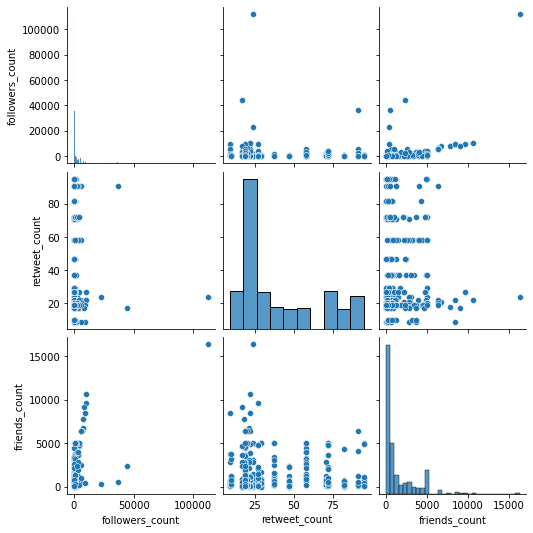

In [23]:
sns.set_context(font_scale=0.05)  
ax = sns.pairplot(retweets_val)

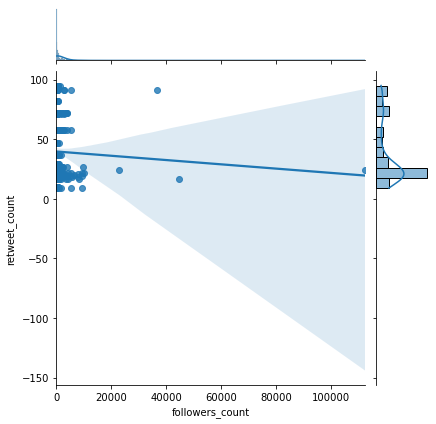

In [24]:
ax = sns.jointplot(x="followers_count", y="retweet_count", data=retweets_df, kind="reg")

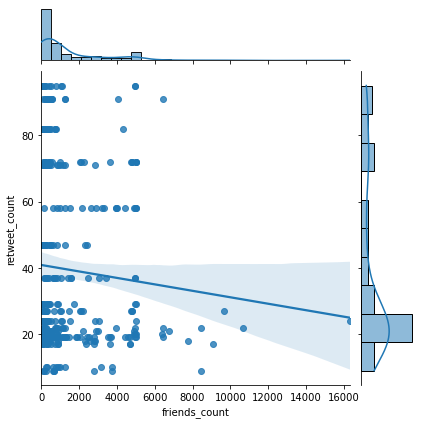

In [25]:

ax = sns.jointplot(x="friends_count", y="retweet_count", data=retweets_df, kind="reg")

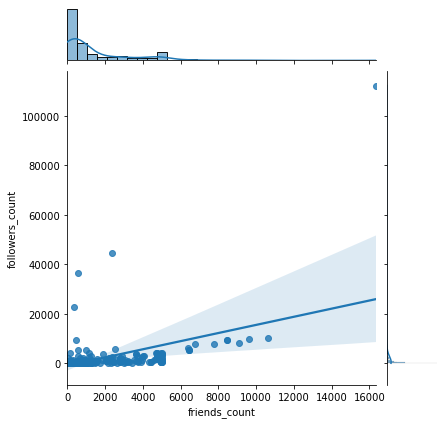

In [26]:
sns.jointplot(x="friends_count", y="followers_count", data=retweets_df, kind="reg");

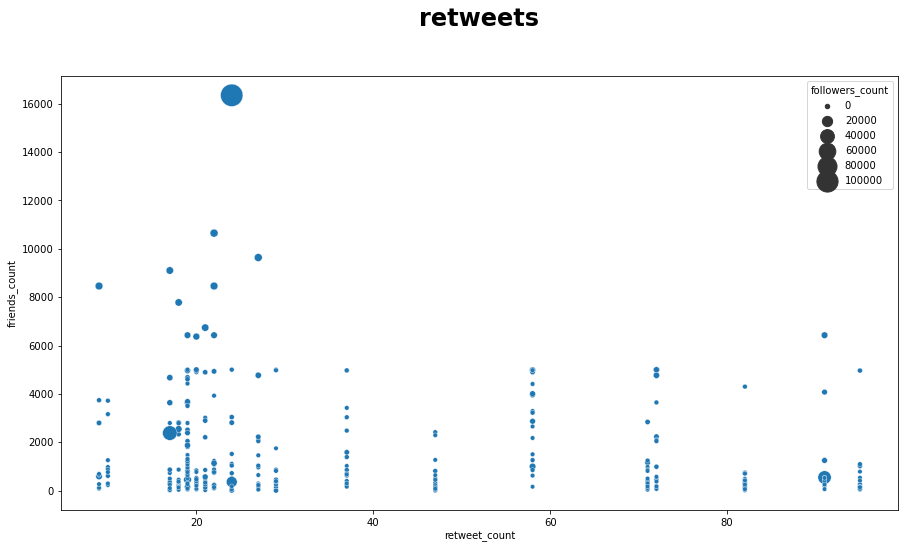

In [27]:
plt.figure(figsize=(15,8))
plt.title("retweets", fontdict= { 'fontsize': 24, 'fontweight':'bold'}, y =1.1)
sns.set_context(font_scale=2)  
ax = sns.scatterplot(data=retweets_df, x="retweet_count", y="friends_count", size="followers_count", sizes = (20,500))

## Auswertung df

In [28]:
df_val = df[['followers_count_x','retweet_count_x','friends_count_x',  'followers_count_y','retweet_count_y','friends_count_y']]

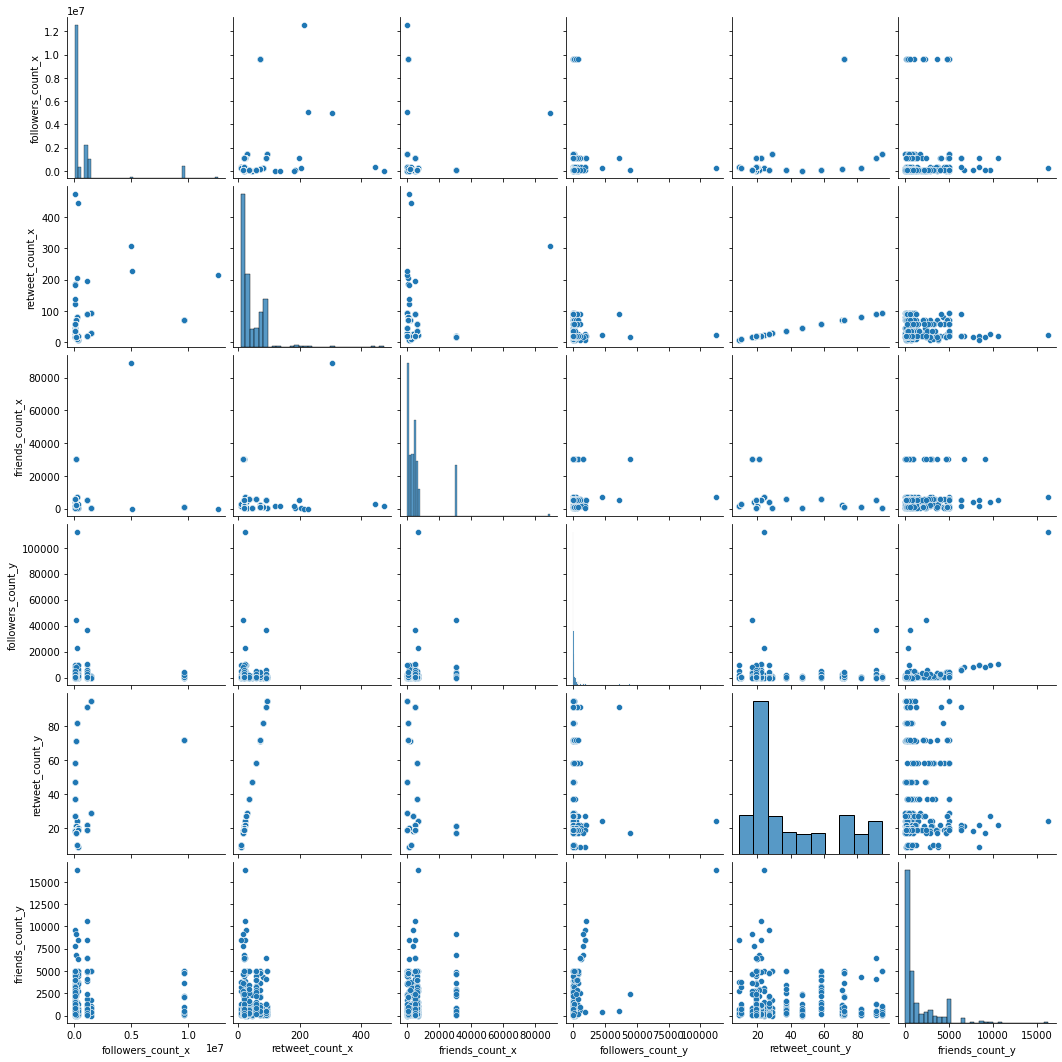

In [29]:
sns.set_context(font_scale= 0.1)  
ax = sns.pairplot(df_val)